# CAPSTONE: Chicago Crime Stats Data Wrangling/Cleaning

**Author: Darius Smith**

**BrainStation | Data Science | April 11, 2023**

## Table of Contents

[Data Information](#Dataset-Information)

[Data Dictionary](#Data-Dictionary)

[Initial Observations](#Initial-Observations)

[Data Preparation Plan](#Data-Preparation-Plan)

[Null Values](#Null-Values)

[Understanding the Data](#Understanding-the-Data)

[Conclusion](#Conclusion)

## Dataset Information

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

## Data Dictionary  

Data about *WHERE* incidents occured: 

- **Block** - The partially redacted address where the incident occured, placing it on the same black as the actual address. (categorical) 

- **Location Description** - Description of the location where the incident occured. (categorical)

- **Beat** - Indicates the beat where the incident occured. A beat is the smallest geographic area - each beat has a dedicated police beat car. Three (3) to five (5) beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has (22) beats. (categorical) 

- **District** - Indicates the police district where the incident occured. (categorical) 

- **Ward** - The ward (City Council district) where the incident occured. (numerical) 

- **Community Area** - Indicates the community area where the incident occured. Chicago has (77) community areas. (categorical) 

- **X Coordinate** - The x coordinate of the location where the incident occured in the State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Y Coordinate** - The y coordinate of the location where the incident occured in the State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Latitude** - The latitude of the location where the incident occured. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Longitude** - The longitude of the location where the incident occured. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Location** - The location where the incident occured in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)



Data about *WHEN* incidents occured:


- **Date** - Date when the incident occured. (numerical)

- **Year** - Year the incident occured. (numerical)

- **ID** - Unique identifier for the record. (numerical) 

- **Case Number** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident. (categorical) 


Data about *WHAT* was the incident

- **IUCR** - The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. (categorical)

- **Primary Type** - The primary description of the IUCR code.(categorical) 

- **Description** - The secondary description of the IUCR code, a subcategory of the primary description. (categorical)

- **Domestic** - Indicates whether the incident was domestic related as defined by the Illinois Domestic Violence Act. (categorical) 

- **FBI Code** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). (categorical) 


Data about *CONSEQUENCES* of the incident
 
- **Arrest** - Indicates whether an arrest was made. (categorical) 


*WHEN* data was updated by the city of Chicago
 
- **Updated On** - Date and time the record was last updated. (numerical)

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#importing the data being viewed and viewing the first 5 rows. 
crime_df = pd.read_csv("Crimes_2001_to_Present.csv") 
crime_df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
#viewing the last 5 rows.
crime_df = pd.read_csv("Crimes_2001_to_Present.csv") 
crime_df.tail(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7742471,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,43.0,7.0,11,1170513.0,1917030.0,2022,01/03/2023 03:46:28 PM,41.927817,-87.648846,"(41.927817456, -87.648845932)"
7742472,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,5.0,14,1161968.0,1923233.0,2022,01/03/2023 03:46:28 PM,41.945022,-87.680072,"(41.945021752, -87.680071764)"
7742473,12938501,JF523997,12/26/2022 10:30:00 PM,021XX W DEVON AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50.0,2.0,07,1160681.0,1942466.0,2022,01/03/2023 03:46:28 PM,41.997825,-87.684267,"(41.997824802, -87.684266677)"
7742474,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,4.0,05,1158237.0,1929586.0,2022,01/03/2023 03:46:28 PM,41.962532,-87.693611,"(41.962531969, -87.693611152)"
7742475,12935341,JF525383,12/20/2022 06:45:00 AM,027XX W ROOSEVELT RD,0810,THEFT,OVER $500,STREET,False,False,...,28.0,29.0,06,1158071.0,1894595.0,2022,01/03/2023 03:46:28 PM,41.866517,-87.695179,"(41.866517317, -87.695178701)"


In [4]:
#learning about the data frame. 
#there are (4) datatypes: (2) booleans, (7) float64, (3) int64, and (10) objects/strings.
#there are (22) columns and (7,742,476) rows. This our shape, but will double check using .shape.
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742476 entries, 0 to 7742475
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
#reconfirming the shape. 
crime_df.shape

(7742476, 22)

## Initial Observations

- There are NaN values in the 'Location Description', 'X coordinate', 'Y coordinate', 'Latitude', 'Longitude', and 'Location' columns.
- 'Date' and 'Year'columns are unorganized. Not in ascending or descending order. Also, both start 'date' and 'year' is 2015.  
- 'Arrest' and 'Domestic' are labeled either True or False. 
- 'Year' and 'Date' also seems to have the same data in them. - (year)
- Date is an object type, needs to be convereted to 'datetime' format.
- 'Location' is a combined 'X coordinate' and 'Y coordinate.' This may be redudant information. 
- 'Ward', 'Community', and 'X coordinate', 'Y coordinate', 'Latitude', 'Longitude', and 'Location' are floats. 
- 'District' seems to be missing from the date. Column is not available in the head. 

## Data Preparation Plan

- Check for duplicates.
- Check for null values.
- If any null values exist, deal with them appropiately.
- Convert 'Date' column to 'datetime' format. Take a look at the column data, and gather some intital insight. 
- Check and see if the 'District' column exists. Gather some insight on column. 
- Pick a few numerical & a few categorical columns and determine what data they are storing and distribution.

In [6]:
#.duplicated() returns a true-false array if a row is a duplicate.
crime_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
7742471    False
7742472    False
7742473    False
7742474    False
7742475    False
Length: 7742476, dtype: bool

There seems to be no visible data that is duplicated in the dataframe.
Will use `.sum` to confirm. 

In [7]:
# Summing the resultant array to get the total number of duplicate rows.
crime_df.duplicated().sum()

0

**After double checking, it is confirmed that there is no duplicated data in the dataframe. Now moving forward with dealing with null values.**

### Dealing with Null Values in the Crime Dataset

- First step, get the sum of null values. 
- Second step, calculate the proportion of null values missing. 
- Third step, decide what to do with the values.

In [8]:
#Getting the sum of null values by column 
crime_df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10093
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Community Area          613476
FBI Code                     0
X Coordinate             85036
Y Coordinate             85036
Year                         0
Updated On                   0
Latitude                 85036
Longitude                85036
Location                 85036
dtype: int64

In [9]:
#Getting the total sum of null values
crime_df.isna().sum().sum()

1663647

In [10]:
#Calculating the proportion of nulls missing. 
crime_df.isna().mean().sort_values(ascending = False)*100

Ward                    7.941219
Community Area          7.923512
Location                1.098305
Longitude               1.098305
Latitude                1.098305
Y Coordinate            1.098305
X Coordinate            1.098305
Location Description    0.130359
District                0.000607
Case Number             0.000052
Domestic                0.000000
Beat                    0.000000
Arrest                  0.000000
Description             0.000000
FBI Code                0.000000
Primary Type            0.000000
IUCR                    0.000000
Year                    0.000000
Updated On              0.000000
Block                   0.000000
Date                    0.000000
ID                      0.000000
dtype: float64

## Null Values

**Intital Observations:**

- There are (10) columns with null values. 
- 'Ward' and 'Community Area' has the highest percentage of null values. 
- 'District' and 'Case Number' has the lowest percentage of null values.

**Options**

- Remove any row that has missing values
- Impute
    - impute with a measure of central tendency (mean or median imputation)
    - do model based imputation 

In [11]:
#Finding columns with a strong relationship to 'Ward'
#Constant of proportionality
crime_df.corr()['Ward'].abs().sort_values(ascending = False)

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_95664/2755375381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crime_df.corr()['Ward'].abs().sort_values(ascending = False)


Ward              1.000000
District          0.685384
Beat              0.642122
Latitude          0.635823
Y Coordinate      0.635689
Community Area    0.529198
X Coordinate      0.445831
Longitude         0.441724
Domestic          0.055672
ID                0.021880
Year              0.021174
Arrest            0.016979
Name: Ward, dtype: float64

In [12]:
#Making a helper function to generate histograms with measures of central tendency

def histogram_helper(col):
    
    plt.figure()
    plt.hist(crime_df[col],bins = 25,color = 'grey')
    plt.xlabel(col)
    plt.axvline(crime_df[col].mean(),label = "mean",color = "red")
    plt.axvline(crime_df[col].median(),label = "median",color = "blue")
    plt.axvline(crime_df[col].mode()[0],label = "mode",color = "black")
    plt.legend()
    plt.title(f"histogram of {col}")
    plt.show()
    
    print("-"*80)
    print(f"mean {crime_df[col].mean()}")
    print(f"median {crime_df[col].median()}")
    print(f"mode {crime_df[col].mode()[0]}")

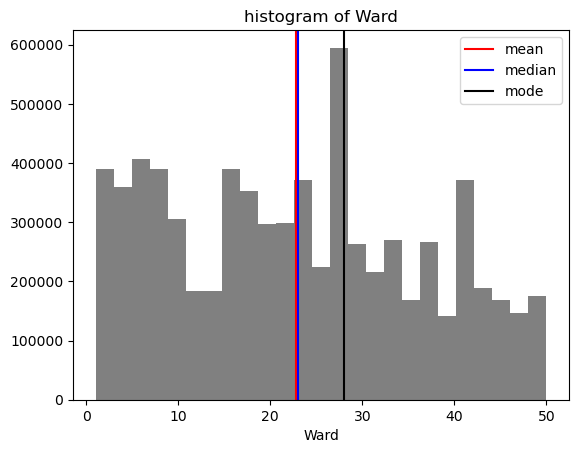

--------------------------------------------------------------------------------
mean 22.75114838328426
median 23.0
mode 28.0


In [13]:
#Running a historgram for 'Ward'

histogram_helper('Ward')

In [14]:
#Going to use median
#Seems like the best value to use for imputation
#Imputing
crime_df.loc[crime_df['Ward'].isna(),'Ward'] = \
crime_df['Ward'].fillna(crime_df['Ward'].median())

In [15]:
#Doing the null report to examine if there are still any in 'Ward'
crime_df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10093
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                         0
Community Area          613476
FBI Code                     0
X Coordinate             85036
Y Coordinate             85036
Year                         0
Updated On                   0
Latitude                 85036
Longitude                85036
Location                 85036
dtype: int64

**There are no more missing values in 'Ward.' Moving forward 'Community Area' null values in our dataframe.**

In [16]:
#Making a helper function to generate histograms with measures of central tendency

def histogram_helper(col):
    
    plt.figure()
    plt.hist(crime_df[col],bins = 25,color = 'grey')
    plt.xlabel(col)
    plt.axvline(crime_df[col].mean(),label = "mean",color = "red")
    plt.axvline(crime_df[col].median(),label = "median",color = "blue")
    plt.axvline(crime_df[col].mode()[0],label = "mode",color = "black")
    plt.legend()
    plt.title(f"histogram of {col}")
    plt.show()
    
    print("-"*80)
    print(f"mean {crime_df[col].mean()}")
    print(f"median {crime_df[col].median()}")
    print(f"mode {crime_df[col].mode()[0]}")

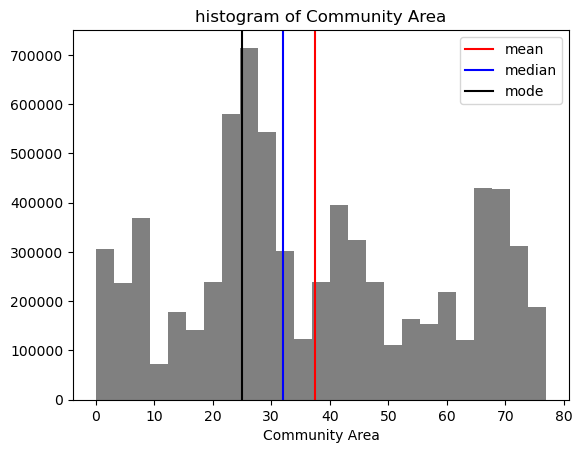

--------------------------------------------------------------------------------
mean 37.489471033805586
median 32.0
mode 25.0


In [17]:
#Running a historgram for 'Community Area'
histogram_helper('Community Area')

In [18]:
# Going to use mode.
#The most common value 

crime_df.loc[crime_df['Community Area'].isna(),'Community Area'] = \
crime_df['Community Area'].fillna(crime_df['Community Area'].mode()[0])

In [19]:
#Doing the null report to examine if there are still any in 'Community Area'
crime_df.isna().sum()

ID                          0
Case Number                 4
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description    10093
Arrest                      0
Domestic                    0
Beat                        0
District                   47
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            85036
Y Coordinate            85036
Year                        0
Updated On                  0
Latitude                85036
Longitude               85036
Location                85036
dtype: int64

**There are no missing values in 'Community Area'. Moving forward with 'District' null values in the dataframe.**

In [20]:
#Making a helper function to generate histograms with measures of central tendency

def histogram_helper(col):
    
    plt.figure()
    plt.hist(crime_df[col],bins = 25,color = 'grey')
    plt.xlabel(col)
    plt.axvline(crime_df[col].mean(),label = "mean",color = "red")
    plt.axvline(crime_df[col].median(),label = "median",color = "blue")
    plt.axvline(crime_df[col].mode()[0],label = "mode",color = "black")
    plt.legend()
    plt.title(f"histogram of {col}")
    plt.show()
    
    print("-"*80)
    print(f"mean {crime_df[col].mean()}")
    print(f"median {crime_df[col].median()}")
    print(f"mode {crime_df[col].mode()[0]}")

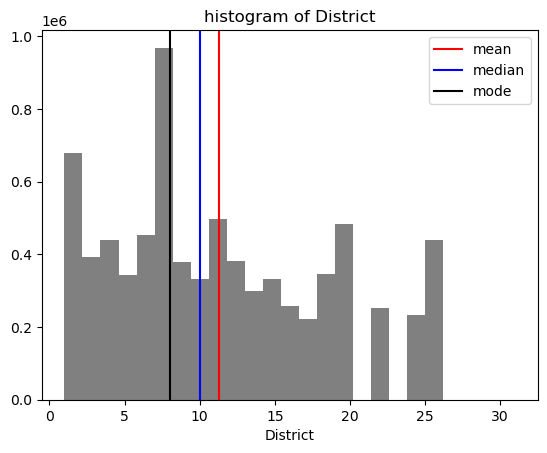

--------------------------------------------------------------------------------
mean 11.294570993159898
median 10.0
mode 8.0


In [21]:
#Running a historgram for 'District'
histogram_helper('District')

In [22]:
# Going to use mode.
#The most common value 

crime_df.loc[crime_df['District'].isna(),'District'] = \
crime_df['District'].fillna(crime_df['District'].mode()[0])

In [23]:
#Doing the null report to examine if there are still any in 'District'
crime_df.isna().sum()

ID                          0
Case Number                 4
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description    10093
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            85036
Y Coordinate            85036
Year                        0
Updated On                  0
Latitude                85036
Longitude               85036
Location                85036
dtype: int64

**There are no missing values in 'District'. There are (7) more columns with null values.

The Plan: 

- Since 'Case Number' has only (4) rows with null values, I will remove them. 
-  For 'Latitude','Longitude', 'X and Y Coordinate', and 'Location' median, mean, or mode cannot be used to replace null values. Unique addresses need to be added manually. In this case, these will be filled in with 0.
- 'Location Description' since it is categorical, will be filled in with 'Unknown.'

In [24]:
#Removing the 4 rows where there were null values in 'Case Number'
crime_df.dropna(subset=['Case Number'], how='all', inplace=True)

In [25]:
#Sanity check; (6) more rows left with null values.
crime_df.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description    10093
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            85035
Y Coordinate            85035
Year                        0
Updated On                  0
Latitude                85035
Longitude               85035
Location                85035
dtype: int64

In [26]:
#How many rows would we have left if we dropped all rows with any nulls
crime_df.dropna(axis = 0, how = 'any').shape[0]

7651006

**There would be a loss of 91,470 rows if we dropped all rows missing any data. That is a lot. Will continue imputing.**

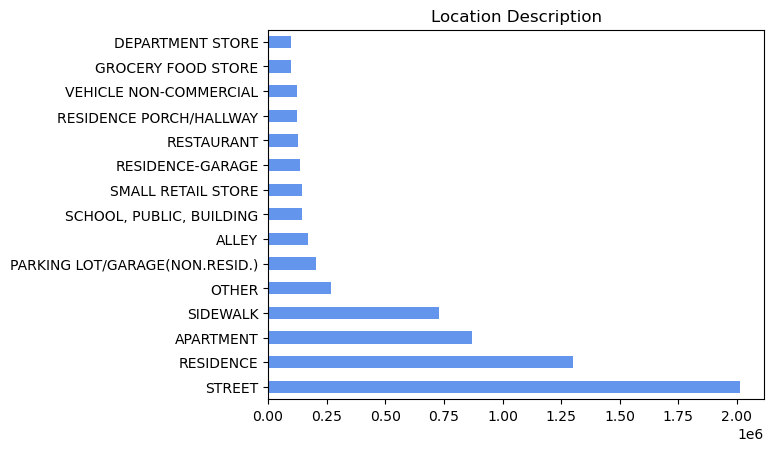

In [27]:
for col in ['Location Description']:
    
    plt.figure()
    crime_df[col].value_counts()[:15].plot(kind = 'barh',title = col, color = 'cornflowerblue')
    plt.show()

**'Location Description' is an object datatype. Null values will be put into an unknown category.**

In [28]:
#Put the nulls into an unknown category for 'Location Description'

for col in ['Location Description']:
    
    crime_df[col].fillna('unknown',inplace = True)

In [29]:
#Sanity check 
crime_df.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            85035
Y Coordinate            85035
Year                        0
Updated On                  0
Latitude                85035
Longitude               85035
Location                85035
dtype: int64

**There are (5) columns left with NaN/null values. Filling in X and Y Coordinate, Latitude, Logitude, and Location with 0.**

In [30]:
crime_df['X Coordinate'] = crime_df['X Coordinate'].fillna(0)

In [31]:
crime_df['Y Coordinate'] = crime_df['Y Coordinate'].fillna(0)

In [32]:
crime_df['Latitude'] = crime_df['Latitude'].fillna(0)

In [33]:
crime_df['Longitude'] = crime_df['Longitude'].fillna(0)

In [34]:
crime_df['Location'] = crime_df['Location'].fillna(0)

In [35]:
#Checking the sum of null values in the dataframe.
crime_df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

**In Summary**

1. Columns were checked for duplicate data.
2. Null values were dealt with appropiately using various imputation methods. 

Next steps, data exploration and analysis, specifically:

- Convert 'Date' column to 'datetime' format. Take a look at the column data, and gather some intital insight. 
- Pick a few numerical & a few categorical columns and determine what data they are storing and distribution.
- Analyze patterns and trends within the columns. 

In [36]:
#'Date' is an object. Will be converting this to 'datetime' format.
crime_df['Date'].unique()

array(['09/05/2015 01:30:00 PM', '09/04/2015 11:30:00 AM',
       '09/01/2018 12:01:00 AM', ..., '12/23/2022 08:41:00 AM',
       '06/27/2022 10:05:00 AM', '12/20/2022 06:45:00 AM'], dtype=object)

In [37]:
# Converting 'Date' column to datatime format
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

In [38]:
#Sanity Check 
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7742472 entries, 0 to 7742475
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [39]:
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,0.0,0.0,2018,04/06/2019 04:04:43 PM,0.000000,0.000000,0
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [40]:
#Gaining information on the columnn.
crime_df['Date']

0         2015-09-05 13:30:00
1         2015-09-04 11:30:00
2         2018-09-01 00:01:00
3         2015-09-05 12:45:00
4         2015-09-05 13:00:00
                  ...        
7742471   2022-06-27 10:05:00
7742472   2022-12-22 18:00:00
7742473   2022-12-26 22:30:00
7742474   2022-12-19 14:00:00
7742475   2022-12-20 06:45:00
Name: Date, Length: 7742472, dtype: datetime64[ns]

In [41]:
crime_df['Date'].value_counts()

2008-01-01 00:01:00    303
2007-01-01 00:01:00    257
2006-01-01 00:01:00    226
2004-01-01 00:00:00    218
2005-01-01 00:01:00    214
                      ... 
2005-02-26 06:04:53      1
2005-02-27 08:30:00      1
2005-02-26 21:56:53      1
2005-02-27 03:20:00      1
2022-12-20 06:45:00      1
Name: Date, Length: 3187378, dtype: int64

**Initial observation looking at the value counts of 'Date', it is clear that New Year's Eve/Day in the morning hours sees a high amount of incidents between the years of (2004 - 2008).** 

In [42]:
crime_df['District'].unique()

array([ 9., 15.,  6., 14., 10., 12.,  8., 16.,  5.,  2.,  4., 22.,  3.,
        1.,  7., 11., 17., 20., 25., 18., 19., 24., 31., 21.])

**The 'District' column does exist even though it is not clear in our initial dataframe head.** 

In [43]:
crime_df['District'].value_counts()

8.0     520545
11.0    497339
6.0     452550
7.0     448535
25.0    440644
4.0     439606
3.0     392705
12.0    383116
9.0     378546
2.0     366335
19.0    347278
18.0    347164
5.0     343352
10.0    333562
15.0    332372
1.0     312334
14.0    299742
16.0    258855
22.0    253760
24.0    233698
17.0    223435
20.0    136763
31.0       232
21.0         4
Name: District, dtype: int64

## Understanding the Data

Looking at the (numerical columns) of 'Year','Ward', and 'Community Area' as well the (categorical columns) of 'Domestic', 'Arrest', and 'Location Description.'

**The Objective** - 

- Gain insights on how the data is distributed and what information they are telling.
- Gain an understanding of any patterns or trends that may be occuring. 
- Starting with the numerical first and then digging into the categorical. 


- 'Year'- (Year the incident test occured.)
- 'Community Area'- (Indicates the community area where the incident occured.)
- 'Ward'- (Week that the WNV test is performed.)
- 'Domestic'- (Indicates whether the incident was domestic related as defined by the Illinois Domestic Violence Act.)
- 'Arrest'- (Indicates whether an arrest was made.)
- 'Location Description' - (Description of the location where the incident occured.)

In [44]:
#Gaining information on the column. 
crime_df['Year']

0          2015
1          2015
2          2018
3          2015
4          2015
           ... 
7742471    2022
7742472    2022
7742473    2022
7742474    2022
7742475    2022
Name: Year, Length: 7742472, dtype: int64

In [45]:
#Gaining information on how many incidents occured in the 'Year.'
#Incidents occured in descending order from year.
crime_df['Year'].value_counts().sort_index()

2001    485872
2002    486800
2003    475979
2004    469420
2005    453768
2006    448174
2007    437081
2008    427159
2009    392814
2010    370491
2011    351959
2012    336256
2013    307458
2014    275723
2015    264736
2016    269775
2017    269043
2018    268743
2019    261211
2020    212035
2021    208427
2022    237079
2023     32469
Name: Year, dtype: int64

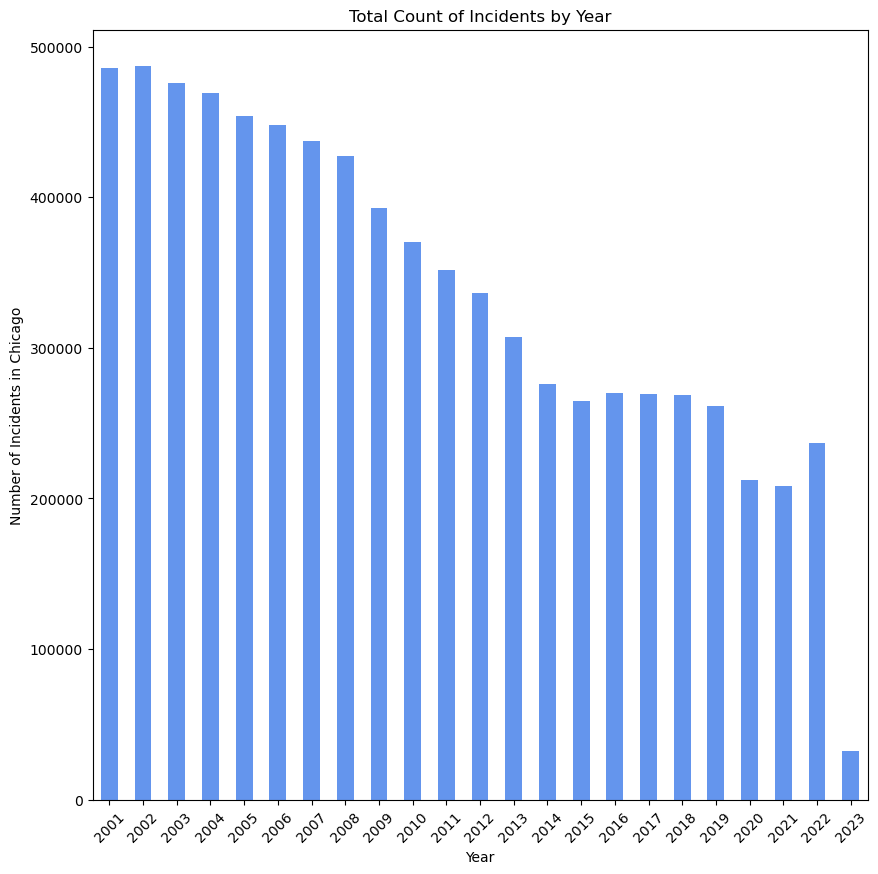

In [46]:
#Plotting a visualization for representation. 
plt.figure(figsize = (10,10))
crime_df['Year'].value_counts().sort_index().plot(kind='bar', color = 'cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Number of Incidents in Chicago')
plt.title('Total Count of Incidents by Year')
plt.xticks(rotation=45)
plt.show()

## 'Year' Insights:

- 2002 saw the highest number of incidents with (486,800).
- 2021 saw the lowest number of incidents with (208,427).
- There seems to be a downward trend in incidents after the year 2002.
- Between the years (2015 - 2018), incidents hovered between (264,000) - (269,000).
- There were (3) increases in incidents: 


    - (2001) - (2002) - saw an increase in incidents. (928) to be exact. 
    - (2015) - (2016) - saw an increase in incidents. (5,039) to be exact.
    - (2021) - (2022) - saw an increase in incidents. (28,652) to be exact.

- After 2016, incidents deacrease until the year 2022 where there is an increase.

In [47]:
#Gaining information on the columnn. 
crime_df['Ward']

0          12.0
1          29.0
2           8.0
3          35.0
4          28.0
           ... 
7742471    43.0
7742472    32.0
7742473    50.0
7742474    47.0
7742475    28.0
Name: Ward, Length: 7742472, dtype: float64

In [48]:
#Gaining information on how many incidents occured in the 'Ward.'
#Incidents occured in descending order from ward.
crime_df['Ward'].value_counts().sort_index()

1.0     136290
2.0     254418
3.0     217450
4.0     141736
5.0     170758
6.0     235531
7.0     193380
8.0     196832
9.0     184561
10.0    121146
11.0     97047
12.0     86965
13.0     87642
14.0     95855
15.0    184745
16.0    204938
17.0    235956
18.0    117594
19.0     63265
20.0    233875
21.0    215884
22.0     83174
23.0    705563
24.0    280288
25.0    103631
26.0    120927
27.0    268039
28.0    326987
29.0    165825
30.0     96954
31.0     97672
32.0    117690
33.0     70762
34.0    199979
35.0     93124
36.0     75165
37.0    192731
38.0     74331
39.0     66949
40.0     75404
41.0     75438
42.0    296545
43.0     89300
44.0     99422
45.0     72938
46.0     95848
47.0     74020
48.0     72097
49.0    102115
50.0     73686
Name: Ward, dtype: int64

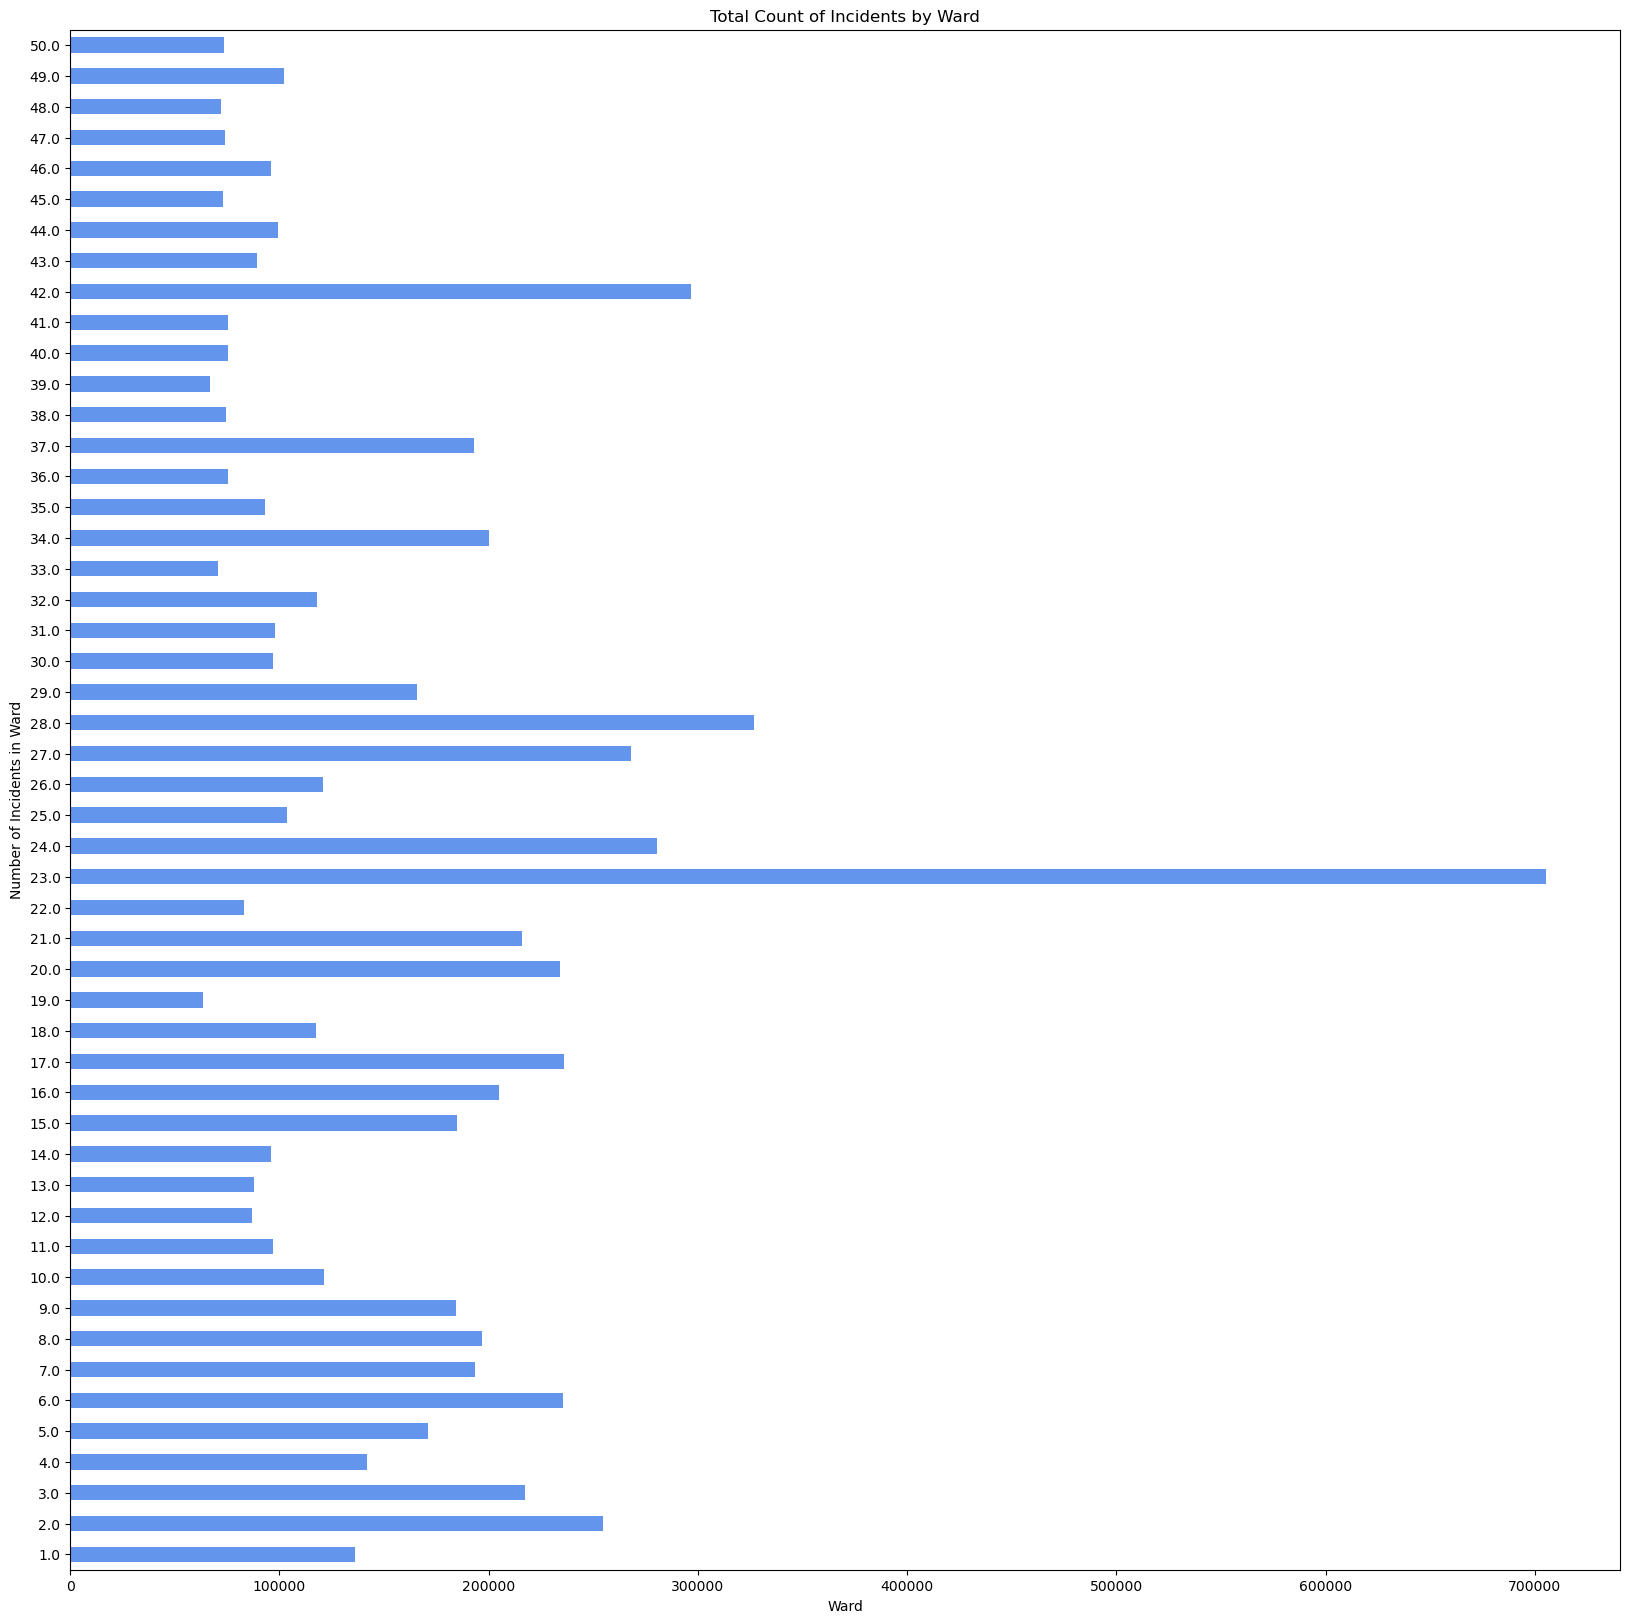

In [49]:
#Plotting a visualization for representation. 
plt.figure(figsize = (20,20))
crime_df['Ward'].value_counts().sort_index().plot(kind='barh', color = 'cornflowerblue')
plt.xlabel('Ward')
plt.ylabel('Number of Incidents in Ward')
plt.title('Total Count of Incidents by Ward')
plt.xticks(rotation=0)
plt.show()

## 'Ward' Insights: 

- Ward 23 has the highest number of incidents with (705,563)
- Ward 28 has the second highest number of incidents with (326,987).
- Ward 19 has the lowest number of incidents with (63,265).
- Of the (50) wards in Chicago, only (22) have 5-digit incidents. That is 44% of the wards. 
- Ward 28 is the 'West Garfield Park' neighborhood. Located in the city's 'west side.'
- Ward 19 is the 'Beverly'or 'Beverly Hills' neighborhood. It is located in the city's far 'south side.' 

In [67]:
#Gaining information on the columnn. 
crime_df['Community Area']

0          61.0
1          25.0
2          44.0
3          21.0
4          25.0
           ... 
7742471     7.0
7742472     5.0
7742473     2.0
7742474     4.0
7742475    29.0
Name: Community Area, Length: 7742472, dtype: float64

In [51]:
crime_df['Community Area'].value_counts()

25.0    1059670
8.0      251002
43.0     235048
23.0     222908
28.0     215343
         ...   
55.0      15745
12.0      13256
47.0      10673
9.0        7077
0.0          76
Name: Community Area, Length: 78, dtype: int64

In [52]:
#Gaining information on how many incidents occured in the 'Community Area'
#Incidents occured in descending order from community area.
crime_df['Community Area'].value_counts().sort_index()

0.0         76
1.0     109922
2.0      91119
3.0     104347
4.0      50957
         ...  
73.0     84876
74.0     16015
75.0     56853
76.0     43236
77.0     71305
Name: Community Area, Length: 78, dtype: int64

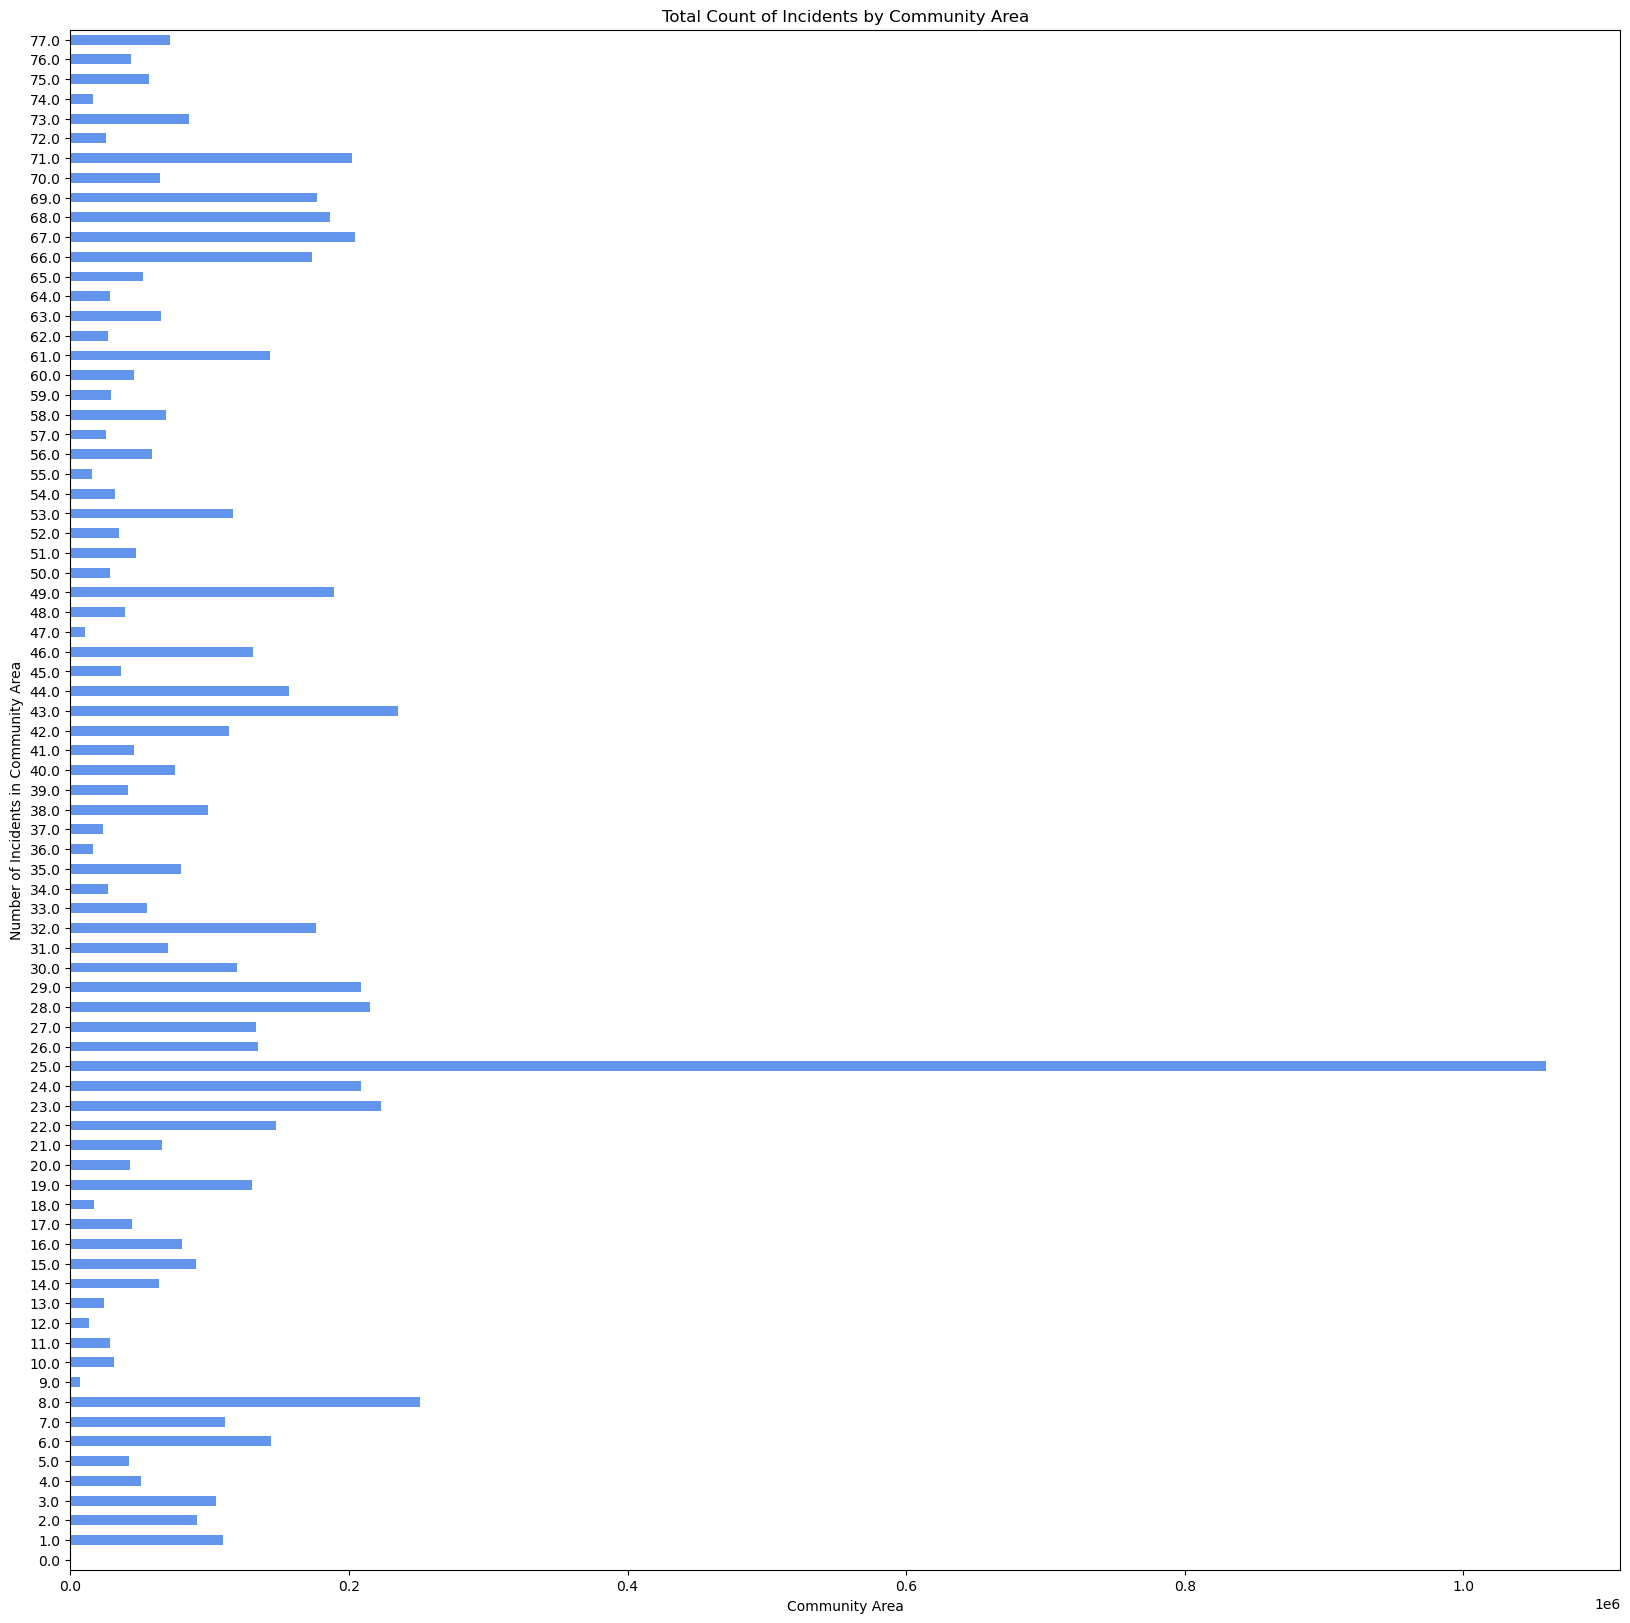

In [53]:
#Plotting a visual for representation
plt.figure(figsize = (20,20))
crime_df['Community Area'].value_counts().sort_index().plot(kind='barh', color = 'cornflowerblue')
plt.xlabel('Community Area')
plt.ylabel('Number of Incidents in Community Area')
plt.title('Total Count of Incidents by Community Area')
plt.xticks(rotation=0)
plt.show()

## 'Community Area' Insights: 

- Community Area 25 has the highest number of incidents with (1,059,670).
- Community Area 9 has the lowest number of incidents with (7,077).
- The community areas with the highest incidents are areas, **25, 8, 43, 23, and 28.**
- The community areas with the lowest incidents are areas, **55, 12, 47, and 9.**
- Community Area 25 is the 'Austin' neighborhood. Located in the city's 'west side.'
- Community Area 9 is the 'Edison Park' neighborhood. It is located in the city's 'north side.' 

In [54]:
#Gaining information on the columnn.
crime_df['Domestic']

0           True
1          False
2           True
3          False
4           True
           ...  
7742471    False
7742472    False
7742473    False
7742474    False
7742475    False
Name: Domestic, Length: 7742472, dtype: bool

In [55]:
#Gaining information on how many incidents occured that were 'Domestic'
#Incidents are either are True or False
crime_df['Domestic'].value_counts()

False    6673294
True     1069178
Name: Domestic, dtype: int64

In [56]:
crime_df['Domestic'].value_counts()/crime_df.shape[0]*100

False    86.190741
True     13.809259
Name: Domestic, dtype: float64

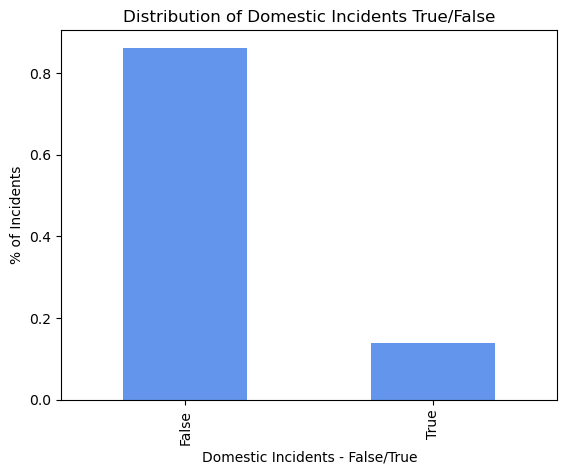

In [57]:
crime_df['Domestic'].value_counts(normalize=True).plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Domestic Incidents True/False')
plt.xlabel('Domestic Incidents - False/True')
plt.ylabel('% of Incidents')
plt.show()

## 'Domestic' Insights: 

- There are (6,673,298) incidents that are not 'Domestic.'
- There are (1,069,178) incidents that are 'Domestic.'
- Incidents that were not 'Domestic' are 86% of total incidents.
- Incidents that were 'Domestic' are 14% of total incidents.
- This may mean that more incidents occur outside than at home. 
- This may also mean that the Illinois Domestic Violence Act may have impact. 

In [58]:
#Gaining information on the columnn.
crime_df['Arrest']

0          False
1          False
2          False
3           True
4          False
           ...  
7742471    False
7742472    False
7742473    False
7742474    False
7742475    False
Name: Arrest, Length: 7742472, dtype: bool

In [59]:
#Gaining information on how many incidents occured that were involved an 'Arrest'
#Incidents are either are True or False
crime_df['Arrest'].value_counts()

False    5713414
True     2029058
Name: Arrest, dtype: int64

In [60]:
crime_df['Arrest'].value_counts()/crime_df.shape[0]*100

False    73.79315
True     26.20685
Name: Arrest, dtype: float64

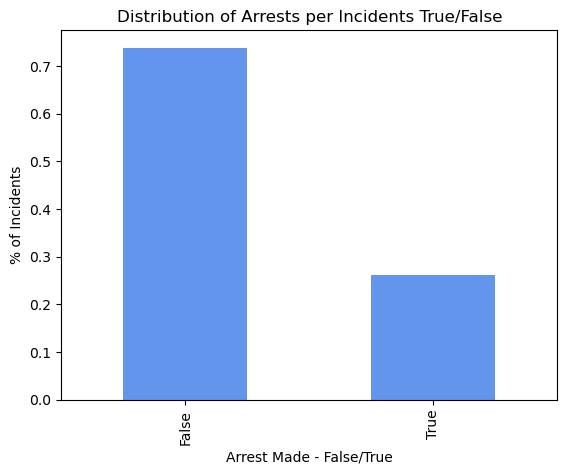

In [61]:
crime_df['Arrest'].value_counts(normalize=True).plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Arrests per Incidents True/False')
plt.xlabel('Arrest Made - False/True')
plt.ylabel('% of Incidents')
plt.show()

## 'Arrest' Insights: 

- There are (5,713,417) incidents where someone was not 'Arrested.'
- There are (2,029,059) incidents where someone was 'Arrested.'
- Incidents where someone was not 'Arrested' accounted for 74% of total incidents.
- Incidents where someone was 'Arrested' accounted for 26% of total incidents.
- There are far less arrests being made compared to the being made. 
- Question for consideration, 'How many repeat offenders are committing crimes and are not being arrested?' 'What impact does this have on communities?'

In [62]:
#Gaining information on the columnn.
crime_df['Location Description']

0                                       RESIDENCE
1                                         CTA BUS
2                                       RESIDENCE
3                                        SIDEWALK
4                                       APARTMENT
                            ...                  
7742471                                   unknown
7742472                                    STREET
7742473    PARKING LOT / GARAGE (NON RESIDENTIAL)
7742474                                 APARTMENT
7742475                                    STREET
Name: Location Description, Length: 7742472, dtype: object

In [63]:
#Gaining information on how many incidents occured that were involved an 'Arrest'
#Incidents are either are True or False
crime_df['Location Description'].value_counts()

STREET                    2014880
RESIDENCE                 1300378
APARTMENT                  871165
SIDEWALK                   727084
OTHER                      270038
                           ...   
TRUCKING TERMINAL               1
CTA SUBWAY STATION              1
JUNK YARD/GARBAGE DUMP          1
CLEANERS/LAUNDROMAT             1
LOADING DOCK                    1
Name: Location Description, Length: 216, dtype: int64

In [64]:
#There are over 215 locations for this column. 
#Looking at the top 15 locations where incidents occur.
crime_df['Location Description'].value_counts()[:15]

STREET                            2014880
RESIDENCE                         1300378
APARTMENT                          871165
SIDEWALK                           727084
OTHER                              270038
PARKING LOT/GARAGE(NON.RESID.)     202997
ALLEY                              171914
SCHOOL, PUBLIC, BUILDING           146389
SMALL RETAIL STORE                 146052
RESIDENCE-GARAGE                   135544
RESTAURANT                         126380
RESIDENCE PORCH/HALLWAY            124216
VEHICLE NON-COMMERCIAL             123399
GROCERY FOOD STORE                  98299
DEPARTMENT STORE                    97993
Name: Location Description, dtype: int64

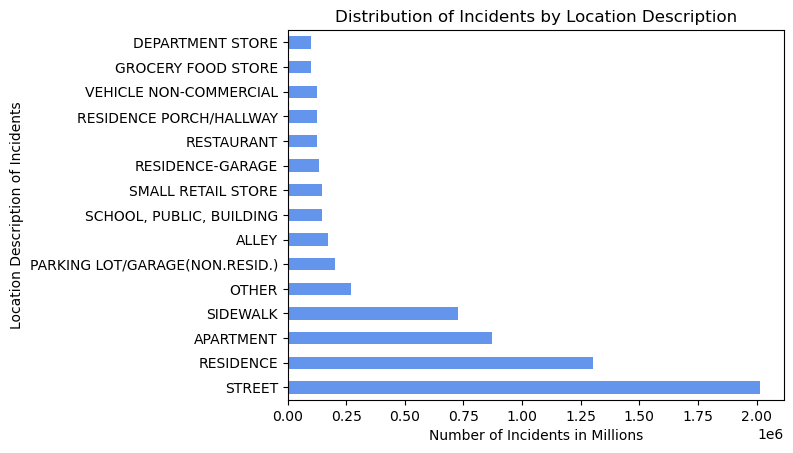

In [65]:
#Getting a visual representation of the column. 
#Picking the top 15 areas for visualization
crime_df['Location Description'].value_counts()[:15].plot(kind = 'barh',color = 'cornflowerblue')
plt.title('Distribution of Incidents by Location Description')
plt.xlabel('Number of Incidents in Millions')
plt.ylabel('Location Description of Incidents')
plt.show()

## 'Location Description' Insights: 

- The top (5) 'Location Descriptions' where incidents occured:
    
    - Street
    - Residence
    - Apartment
    - Sidewalk
    - Other
    
- There are (2,014,882) incidents that occured on the street.
- (26%) of incidents occur on the street. 
- The top (5) 'Location Descriptions' where incidents occured, accounted for 67% of the total incidents.
- Incidents happen at home and outside the most.
- Residence and Apartment seem similar location wise. 
- Street and Sidewalk seem similar location wise. 

## Conclusion 

In intial data wrangling and cleaning the following was observed: 

1. There weren't any duplicated data. 
2. There were null values, however, they were imputed using various imputation methods. 

As far as intial analyzation with the numerical data and categorical data in the dataset, it was observed that:

**'Year' Insights:**

- 2002 saw the highest number of incidents with (486,800).
- 2021 saw the lowest number of incidents with (208,427).
- There seems to be a downward trend in incidents after the year 2002.
- Between the years (2015 - 2018), incidents hovered between (264,000) - (269,000).
- There were (3) increases in incidents: 


    - (2001) - (2002) - saw an increase in incidents. (928) to be exact. 
    - (2015) - (2016) - saw an increase in incidents. (5,039) to be exact.
    - (2021) - (2022) - saw an increase in incidents. (28,652) to be exact.

- After 2016, incidents deacrease until the year 2022 where there is an increase.



**'Ward' Insights:** 

- Ward 28 has the highest number of incidents with (326,987).
- Ward 19 has the lowest number of incidents with (63,265).
- Of the (50) wards in Chicago, only (22) have 5-digit incidents. That is 44% of the wards. 
- Ward 28 is the 'West Garfield Park' neighborhood. Located in the city's 'west side.'
- Ward 19 is the 'Beverly'or 'Beverly Hills' neighborhood. It is located in the city's far 'south side.' 


**'Community Area' Insights:** 

- Community Area 25 has the highest number of incidents with (1,059,670).
- Community Area 9 has the lowest number of incidents with (7,077).
- The community areas with the highest incidents are areas, **25, 8, 43, 23, and 28.**
- The community areas with the lowest incidents are areas, **55, 12, 47, and 9.**
- Community Area 25 is the 'Austin' neighborhood. Located in the city's 'west side.'
- Community Area 9 is the 'Edison Park' neighborhood. It is located in the city's 'north side.'


**'Domestic' Insights:** 

- There are (6,673,298) incidents that are not 'Domestic.'
- There are (1,069,178) incidents that are 'Domestic.'
- Incidents that were not 'Domestic' are 86% of total incidents.
- Incidents that were 'Domestic' are 14% of total incidents.
- This may mean that more incidents occur outside than at home. 
- This may also mean that the Illinois Domestic Violence Act may have impact. 


**'Arrest' Insights:** 

- There are (5,713,417) incidents where someone was not 'Arrested.'
- There are (2,029,059) incidents where someone was 'Arrested.'
- Incidents where someone was not 'Arrested' accounted for 74% of total incidents.
- Incidents where someone was 'Arrested' accounted for 26% of total incidents.
- There are far less arrests being made compared to the being made. 
- Question for consideration, 'How many repeat offenders are committing crimes and are not being arrested?' 'What impact does this have on communities?'


**'Location Description' Insights:** 

- The top (5) 'Location Descriptions' where incidents occured:
    
    - Street
    - Residence
    - Apartment
    - Sidewalk
    - Other
    
    
- There are (2,014,882) incidents that occured on the street.
- (26%) of incidents occur on the street. 
- The top (5) 'Location Descriptions' where incidents occured, accounted for 67% of the total incidents.
- Incidents happen at home and outside the most.
- Residence and Apartment seem to be similar location wise. 
- Street and Sidewalk seem to be similar location wise. 